In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import sys

# import notebook tqdm for notbooks
from tqdm import tqdm_notebook as tqdm

In [9]:
path = '../data/computer-go-sgf/'
# recursively get all file paths in the directory that end in .sgf
sgf_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path) for f in filenames if f.endswith('.sgf')]
print('Found', len(sgf_files), 'sgf files')

Found 1476703 sgf files


In [11]:
def load_sgf(filename):
    with open(filename, 'r') as f:
        # save as a string to variable file
        file = f.read()

    return file


def get_player_names(file):
    # get the player names
    player_names = []
    for line in file.split('\n'):
        if 'PB[' in line:
            player_names.append(line.split('[')[1].split(']')[0])
        if 'PW[' in line:
            player_names.append(line.split('[')[1].split(']')[0])
    return player_names


players = {}
for sgf_file in tqdm(sgf_files):
    file = load_sgf(sgf_file)
    player_names = get_player_names(file)
    if len(player_names) == 2:
        for player in player_names:
            if player not in players:
                players[player] = 0
            players[player] += 1

print(players)


{'fuego1604_10k': 58926, 'CrazyStone-0006-99': 206628, 'sai_S1_9461_p1000': 70568, 'khd0.6-1050Ti': 884, 'DCNN_AyaF128a523x1': 87494, 'stop-0.9-002': 42336, 'Stop-0.9-005': 285694, 'kata181_b60s580_p1': 402, 'kata181b40s1148_p1': 19418, 'kata18b40s1148v100': 424, 'khd0.7.365-1050Ti': 1570, 'khd0.6.365-1050Ti': 334, 'kata181_b20s530_p1': 1594, 'kata181b40s1148v50': 1868, 'Gnugo-3.7.10-a1': 333176, 'chenyu': 6, 'Aya783a_50': 155896, 'go11test': 806, 'test_D383': 24, 'Ayago11test': 4, 'ws-210530_9lv5': 3914, 'kata_s655_T2': 58, 'kata_s632_T2': 128, 'kata_s1184_T2': 56, 'khd0.8.34-1050Ti': 1252, 'khd0.7.986-1050Ti': 958, 'kata13b20s191_v400': 7838, 'khd0.7.32-1050Ti': 100, 'kata-dg-32': 140, 'kata110_s167_v400': 66, 'kata-GaoGo-9x9': 366, 'strongest_in_CGOS': 76, 'sai081_s1_800v': 6, 'early_katago_800v': 50, 'ktg_6b': 16, 'zen': 2, 'budgie-5k-03acae2': 196, 'budgie-5k-e1bf447': 32, 'budgie-5k-30b8dd6': 8, 'budgie-5k-9aa833b': 2248, 'budgie-10k-9aa833b': 56, 'net_1k': 3070, 'net_8k': 3508,

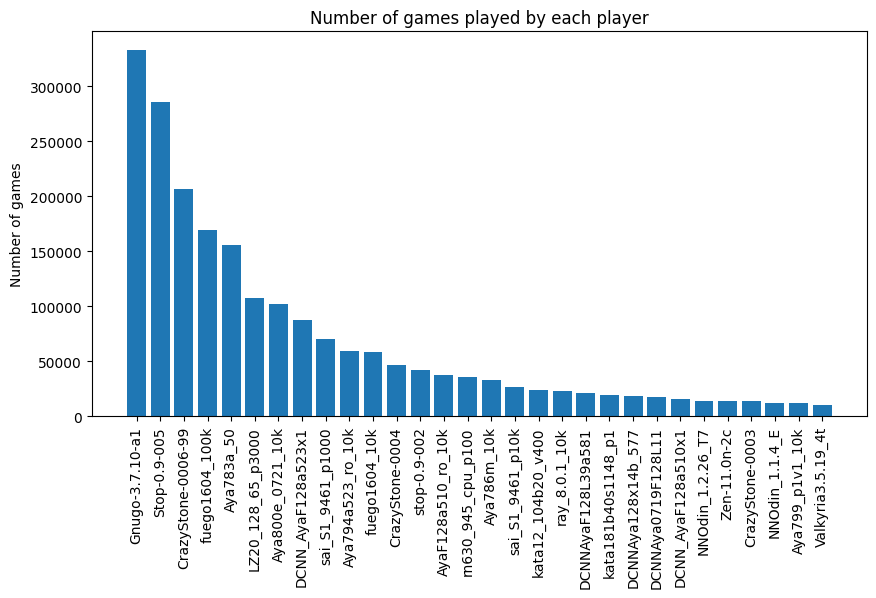

In [14]:
# plot the number of games each player has played
plt.figure(figsize=(10, 5))
# order players by number of games played desc
players = {k: v for k, v in sorted(players.items(), key=lambda item: item[1], reverse=True)}
# plot the top 20
p = dict(list(players.items())[:30])
plt.bar(p.keys(), p.values())
plt.xticks(rotation=90)
plt.ylabel('Number of games')
plt.title('Number of games played by each player')
plt.show()

In [15]:
# how many games played by CrazyStone-0006-99
print('CrazyStone-0006-99 played', players['CrazyStone-0006-99'], 'games')

CrazyStone-0006-99 played 206628 games


In [16]:
# load ../data/cgos-9x9-rankings.html as text
df = pd.read_html('../data/cgos-9x9-rankings.html')[0]

In [20]:
print(df.head())
print(df.shape)

   Rank                Name   Elo    +    −  Games score  opponent draw
0     1     katab40s37-pda1  3510   59   59    298   92%      2916  12%
1     2    katab40s37-awsp3  3438   48   48    290   88%      2974  24%
2     3  KG30b11_406_2x2060  3383  113  113    144   96%      2785   5%
3     4          rn.6.3.945  3343   52   52    201   73%      2982  27%
4     5     CrazyStone-0005  3305   40   40    435   76%      2919  20%
(1298, 9)


In [36]:
# print number of games where elo > 2000
print('Number of games where elo > 2000:', df[df['Elo'] > 2500]['Games'].sum())

Number of games where elo > 2000: 1149633


In [22]:
# save file to cgos-rankings.csv   
df.to_csv('../data/cgos-rankings.csv', index=False)